# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [2]:
titanic_df = pd.read_csv('titanic.csv')

❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.shape

(891, 12)

In [8]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [10]:
titanic_df = titanic_df.drop("Cabin", axis = 1)

## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [13]:
pclass_df = titanic_df.groupby("Pclass")[["PassengerId"]].count()
pclass_df

,PassengerId
Pclass,
1,216
2,184
3,491


Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

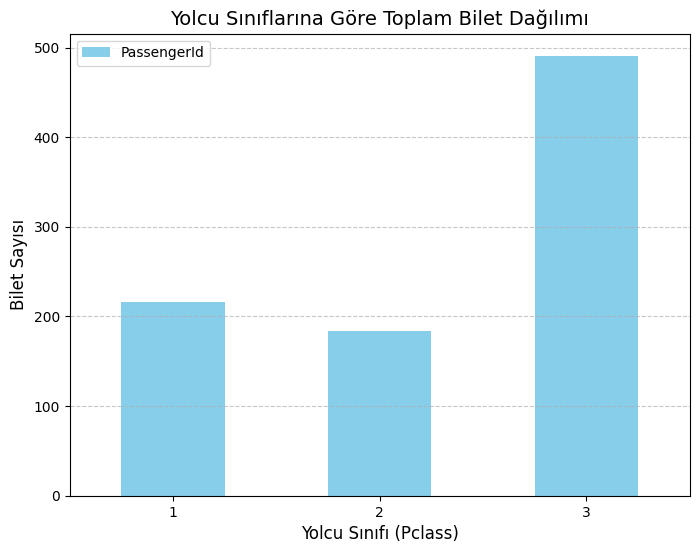

In [15]:
pclass_df.plot(kind='bar', color='skyblue', figsize=(8, 6))

# Grafiği süsleyelim
plt.title('Yolcu Sınıflarına Göre Toplam Bilet Dağılımı', fontsize=14)
plt.xlabel('Yolcu Sınıfı (Pclass)', fontsize=12)
plt.ylabel('Bilet Sayısı', fontsize=12)
plt.xticks(rotation=0) # X eksenindeki rakamların dik değil, düz durması için
plt.grid(axis='y', linestyle='--', alpha=0.7) # Arka plana yardımcı çizgiler

plt.show()

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

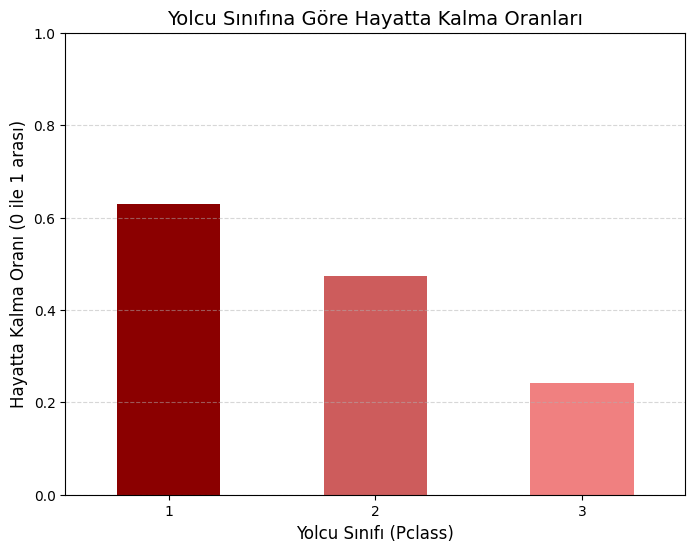

In [17]:
survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()

# Grafiği çizelim
survival_rate.plot(kind='bar', color=['darkred', 'indianred', 'lightcoral'], figsize=(8, 6))

# Grafiği anlamlandıralim
plt.title('Yolcu Sınıfına Göre Hayatta Kalma Oranları', fontsize=14)
plt.xlabel('Yolcu Sınıfı (Pclass)', fontsize=12)
plt.ylabel('Hayatta Kalma Oranı (0 ile 1 arası)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1) # Y eksenini 0 ile 1 arasında sabitleyelim
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [21]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

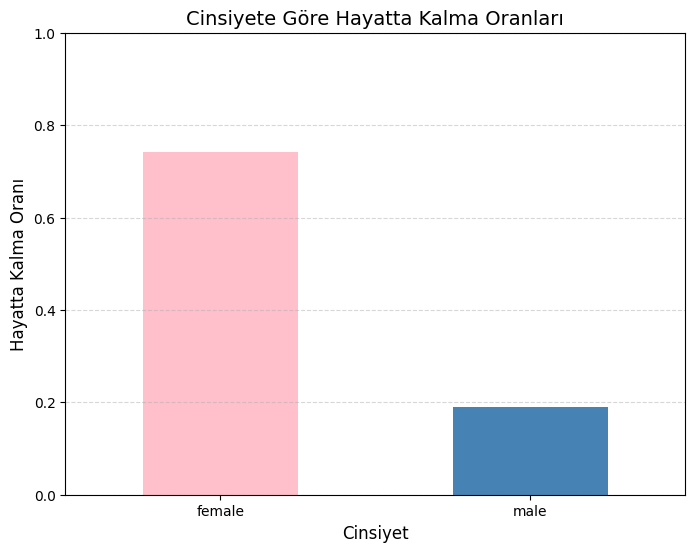

In [22]:
sex_survival_rate = titanic_df.groupby('Sex')['Survived'].mean()

# Grafiği çizelim
sex_survival_rate.plot(kind='bar', color=['pink', 'steelblue'], figsize=(8, 6))

# Grafiği düzenleyelim
plt.title('Cinsiyete Göre Hayatta Kalma Oranları', fontsize=14)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Hayatta Kalma Oranı', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

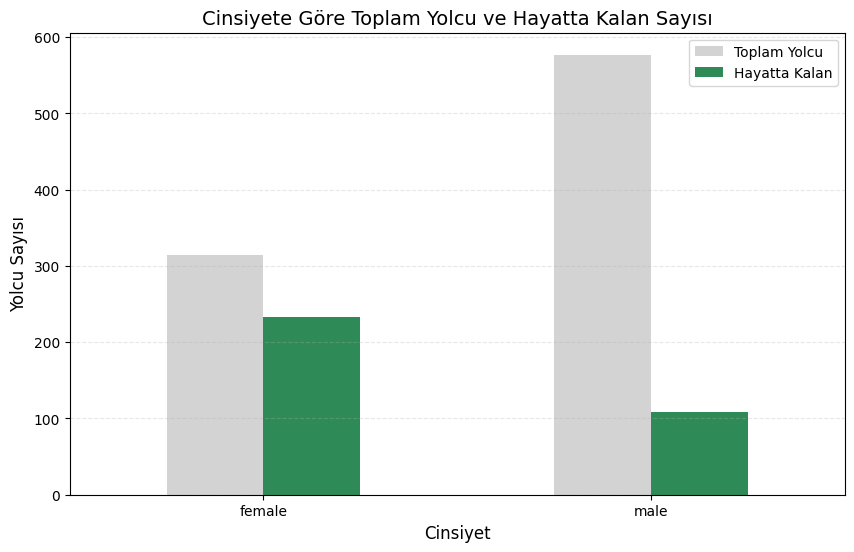

        Total  Survived
Sex                    
female    314       233
male      577       109


In [23]:
survivors_df = titanic_df.groupby('Sex')['Survived'].agg(['count', 'sum'])

# 2. Adım: Sütun isimlerini daha şık hale getirelim
survivors_df.columns = ['Total', 'Survived']

# 3. Adım: Plot edelim
survivors_df.plot(kind='bar', figsize=(10, 6), color=['lightgrey', 'seagreen'])

# Grafiği güzelleştirelim
plt.title('Cinsiyete Göre Toplam Yolcu ve Hayatta Kalan Sayısı', fontsize=14)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Yolcu Sayısı', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Toplam Yolcu', 'Hayatta Kalan'])
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

# DataFrame'i görelim
print(survivors_df)

## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [24]:
# Yaşı 18'den küçük olanları filtrele (Boolean Indexing)
children_df = titanic_df[titanic_df['Age'] < 18]

# Kaç çocuk yolcu olduğunu ve verinin ilk birkaç satırını görelim
print(f"Toplam Çocuk Yolcu Sayısı: {len(children_df)}")
print(children_df.head())

Toplam Çocuk Yolcu Sayısı: 113
    PassengerId  Survived  Pclass                                  Name  \
7             8         0       3        Palsson, Master. Gosta Leonard   
9            10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10           11         1       3       Sandstrom, Miss. Marguerite Rut   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
16           17         0       3                  Rice, Master. Eugene   

       Sex   Age  SibSp  Parch   Ticket     Fare Embarked  
7     male   2.0      3      1   349909  21.0750        S  
9   female  14.0      1      0   237736  30.0708        C  
10  female   4.0      1      1  PP 9549  16.7000        S  
14  female  14.0      0      0   350406   7.8542        S  
16    male   2.0      4      1   382652  29.1250        Q  


❓ Titanic’te kaç çocuk vardı?

In [25]:
# Çocuk sayısını öğrenelim
print(len(children_df))

# Veya alternatif olarak:
# print(children_df.shape[0])

113


❓Kaç çocuk hayatta kaldı?

In [26]:
# 1. Yöntem: Sadece 'Survived' sütununu toplayarak (1'ler hayatta kalanları temsil eder)
survived_children_count = children_df['Survived'].sum()

# 2. Yöntem: Filtreleme yaparak
# survived_children_count = len(children_df[children_df['Survived'] == 1])

print(f"Hayatta kalan çocuk sayısı: {survived_children_count}")

# Hayatta kalma oranını da hızlıca görelim
survival_rate = children_df['Survived'].mean()
print(f"Çocukların hayatta kalma oranı: %{survival_rate * 100:.2f}")

Hayatta kalan çocuk sayısı: 61
Çocukların hayatta kalma oranı: %53.98


❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

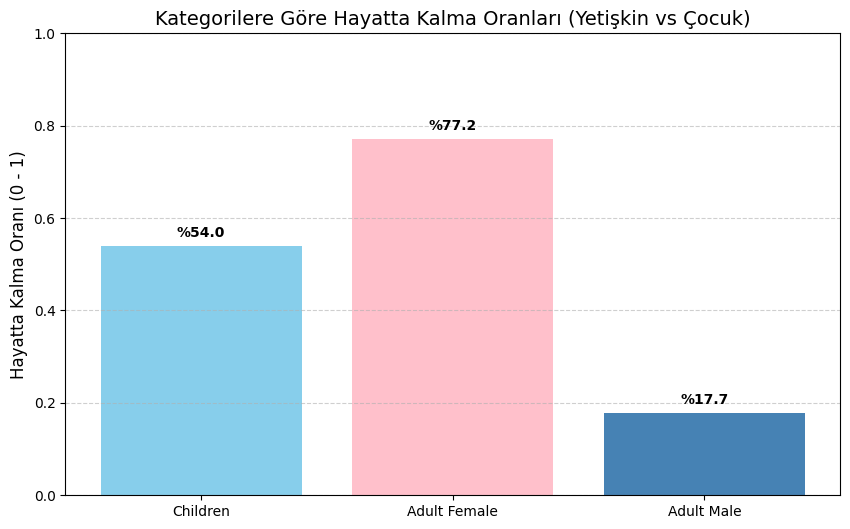

In [27]:
children = titanic_df[titanic_df['Age'] < 18]

# Yetişkin Kadınlar (18+ yaş ve female)
adult_females = titanic_df[(titanic_df['Age'] >= 18) & (titanic_df['Sex'] == 'female')]

# Yetişkin Erkekler (18+ yaş ve male)
adult_males = titanic_df[(titanic_df['Age'] >= 18) & (titanic_df['Sex'] == 'male')]

# 2. Hayatta Kalma Oranlarını Hesaplama (.mean() ile)
rates = {
    'Children': children['Survived'].mean(),
    'Adult Female': adult_females['Survived'].mean(),
    'Adult Male': adult_males['Survived'].mean()
}

# 3. Görselleştirme
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'pink', 'steelblue']
plt.bar(rates.keys(), rates.values(), color=colors)

# Grafiği süsleyelim
plt.title('Kategorilere Göre Hayatta Kalma Oranları (Yetişkin vs Çocuk)', fontsize=14)
plt.ylabel('Hayatta Kalma Oranı (0 - 1)', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Oranları çubukların üzerine yazdıralım
for i, v in enumerate(rates.values()):
    plt.text(i, v + 0.02, f"%{v*100:.1f}", ha='center', fontweight='bold')

plt.show()

## [Opsiyonal] Big families

❓ Daha büyük ailelerin hayatta kalması daha mı zordu?

Burada, yolcunun aile büyüklüğünü gösteren yeni bir sütunu `DataFrame` ine ekleyeceksin.
  

In [ ]:
# SENİN KODUN BURAYA

## [Opsiyonal] Distinguished titles

❓ Tahliye sırasında ünvanı (Mr, Mrs, Dr vb.) olan yolculara daha fazla öncelik verildi mi?

Bunu incelemek için, bazı string manipülasyonları yaparak her yolcu için ünvanını içeren yeni bir sütun oluştur.

In [ ]:
# SENİN KODUN BURAYA